<a href="https://colab.research.google.com/github/rbutronelectrosof/Utilidades/blob/main/herramientas_mcl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows',10)
import numpy as np

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/isocronas/2Gys-0 DEX.txt", index_col=0)
dfcumulo=df1[(df1["umag"]<30) & (df1["gmag"]<30) & (df1["rmag"]<30) & (df1["imag"]<30) & (df1["zmag"]<30) ]
dfcumulo = dfcumulo.replace(0, pd.np.nan)# elimino los ceros de mi lista
dfcumulo.fillna(value=0, inplace=True)
dfcumulo.dropna(inplace=True)
dfcumulo = dfcumulo.dropna(axis=1) # filtra lo que tenga NameError

dfcumulo['u_r'] = dfcumulo['umag'] - dfcumulo['rmag']
dfcumulo['u_g'] = dfcumulo['umag'] - dfcumulo['gmag']
dfcumulo['g_r'] = dfcumulo['gmag'] - dfcumulo['rmag']
dfcumulo['r_i'] = dfcumulo['umag'] - dfcumulo['rmag']
dfcumulo['i_z'] = dfcumulo['umag'] - dfcumulo['gmag']
dfcumulo['u_i'] = dfcumulo['gmag'] - dfcumulo['rmag']
dfcumulo = dfcumulo.iloc[:270]#limita los cumulos

#print(dfcumulo)


##correlation matrix

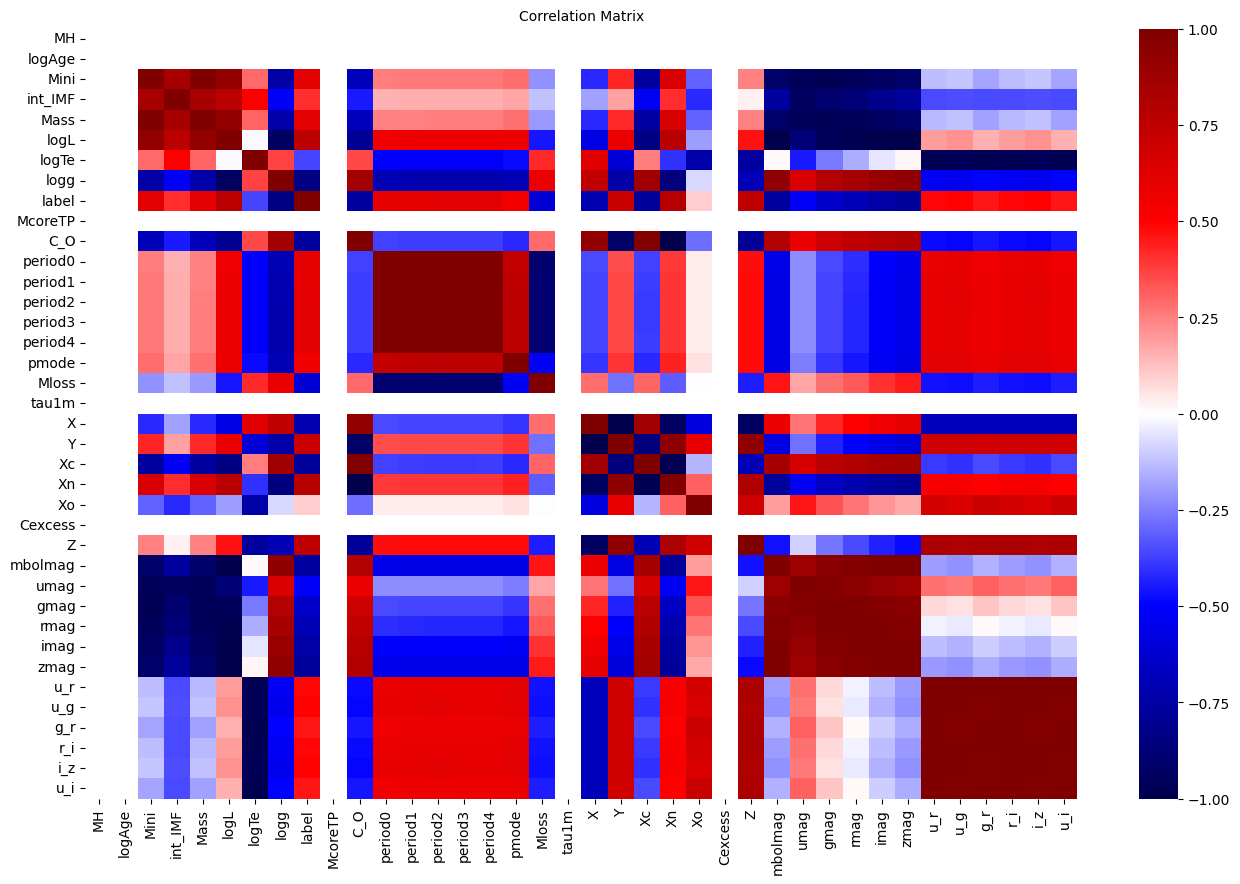

In [ ]:
import seaborn as sns
def plot_corr_matrix(data,features=None,annot=True,s=(16,10)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
    ax= sns.heatmap(corr, annot=annot, xticklabels=corr.columns,
    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Correlation Matrix", fontsize = 10)
    plt.show()

plot_corr_matrix(dfcumulo,annot=False)

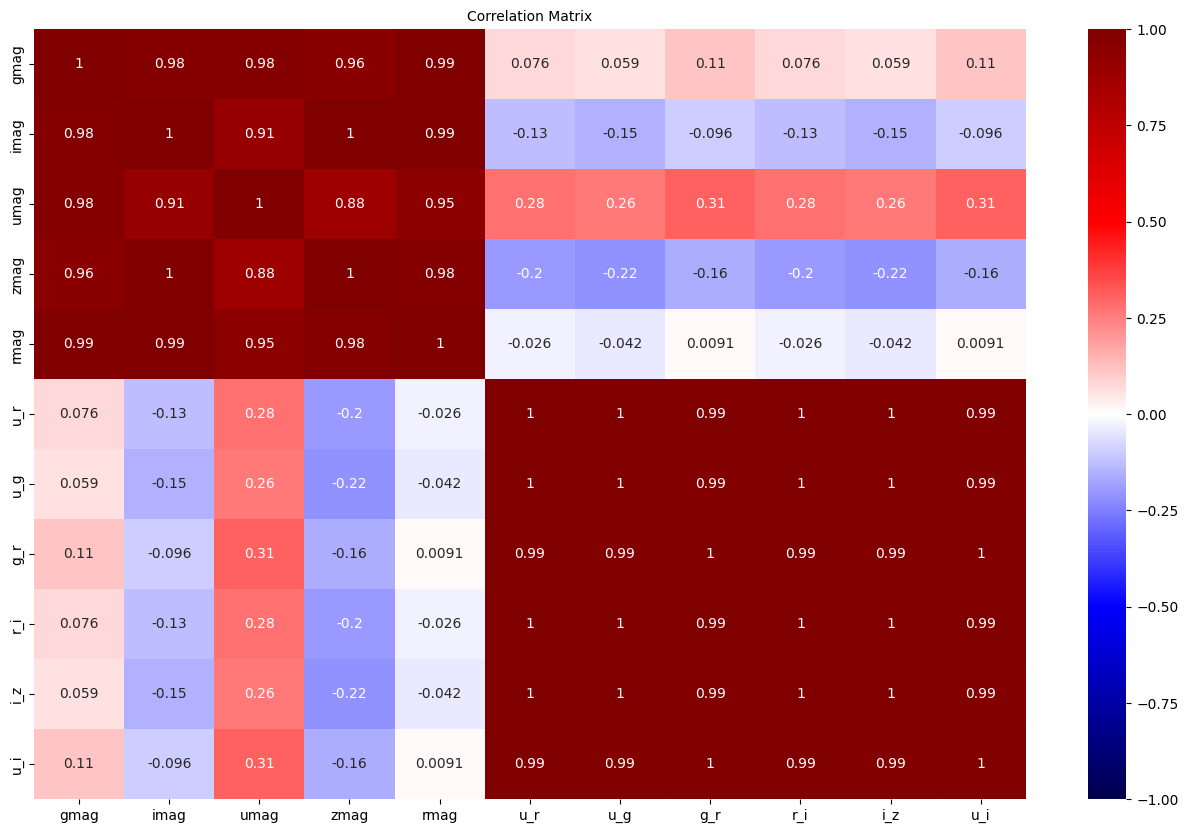

In [ ]:
feat_select = ['gmag','imag','umag','zmag','rmag','u_r','u_g','g_r','r_i','i_z','u_i']
plot_corr_matrix(dfcumulo,features=feat_select)


##Principal Component Analysis (PCA)
describe the variance in the data


Text(0.5, 0, 'components')

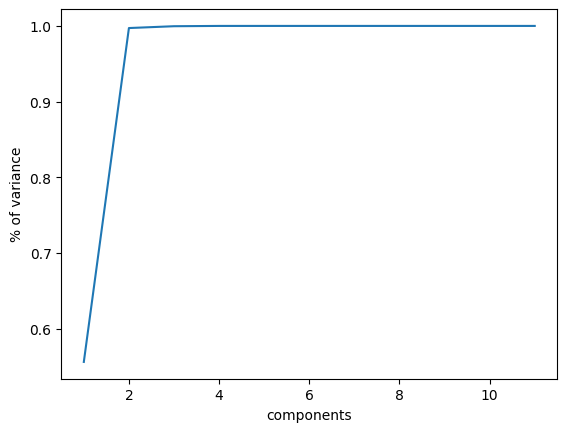

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


cumuloselec = ['u_r','u_g','g_r','r_i','i_z','u_i','gmag','imag','umag','zmag','rmag']
dfcumulo = dfcumulo.drop(columns=[col for col in dfcumulo.columns if col not in cumuloselec])

scaler = StandardScaler().fit(dfcumulo)
stdtab = pd.DataFrame(scaler.transform(dfcumulo))
n = len(stdtab.columns)
sklearn_pca = PCA(n_components=n,random_state=1)
xpca = sklearn_pca.fit_transform(stdtab)
varx=sklearn_pca.explained_variance_ratio_
plt.plot(np.arange(1,n+1),varx.cumsum())
plt.ylabel("% of variance")
plt.xlabel("components")

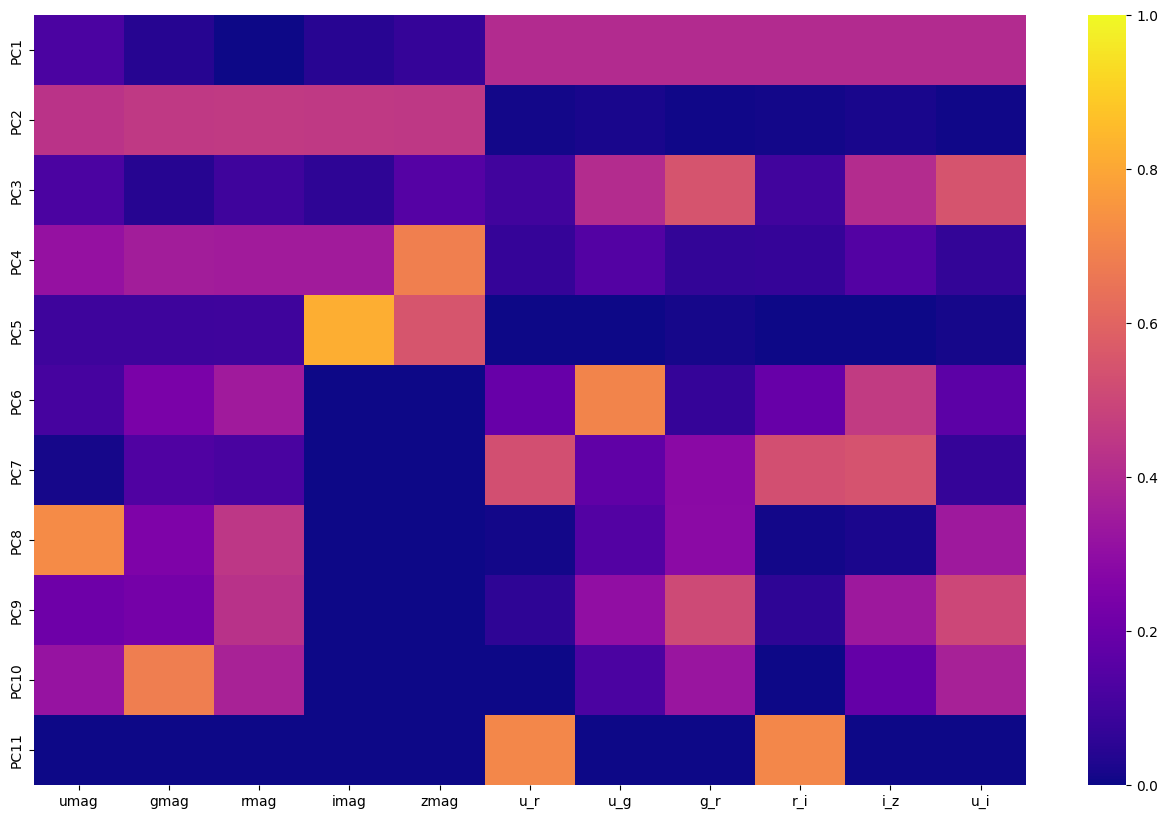

In [ ]:
components = sklearn_pca.components_
ind = []
for i in range(components.shape[0]):
    ind.append("PC"+str(i+1))
feature_weights = pd.DataFrame( np.abs(components),columns=dfcumulo.columns,index=ind)
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax = sns.heatmap(feature_weights,cmap="plasma",vmin=0,vmax=1)

 #only 5 dimensions

Text(0.5, 0, 'components')

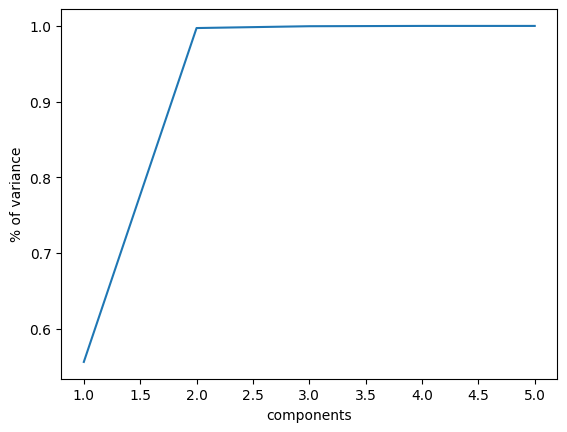

In [ ]:
n =5
sklearn_pca = PCA(n_components=n,random_state=1)
ind=[]
for i in range(n):
    ind.append("PC"+str(i+1))
xpca = sklearn_pca.fit_transform(stdtab)
varx=sklearn_pca.explained_variance_ratio_
plt.plot(np.arange(1,n+1),varx.cumsum())
plt.ylabel("% of variance")
plt.xlabel("components")

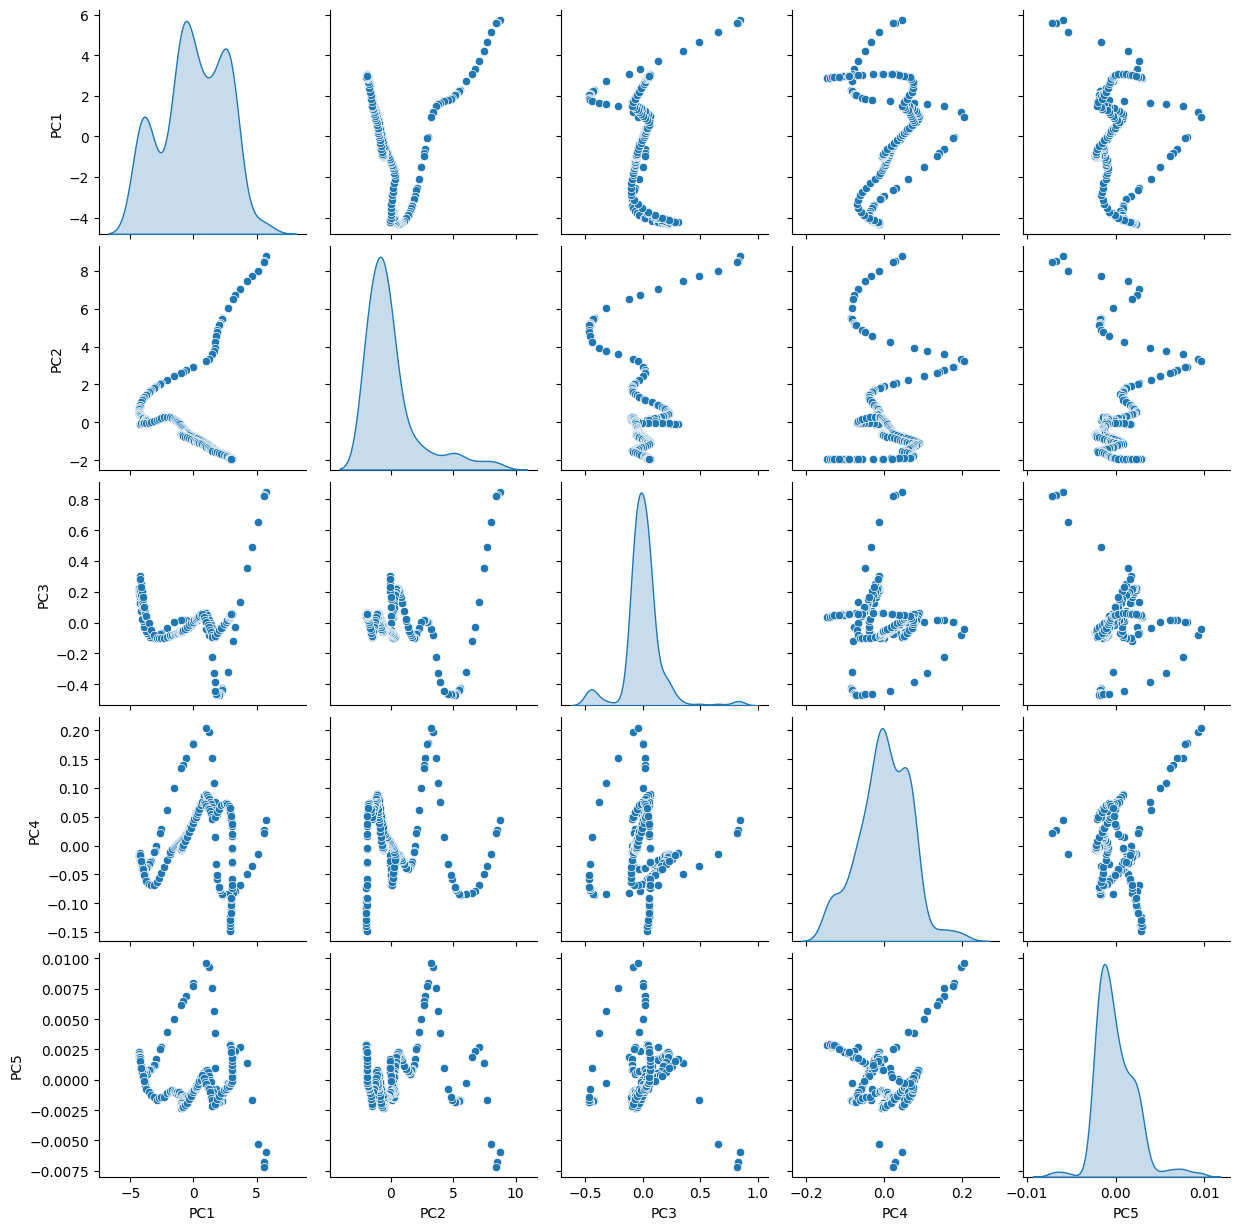

In [ ]:
transtab = pd.DataFrame(xpca,columns=ind)
sns.pairplot(transtab,diag_kind="kde")

#use DBSCAN to find clusters in the data.

2 clusters were were found.


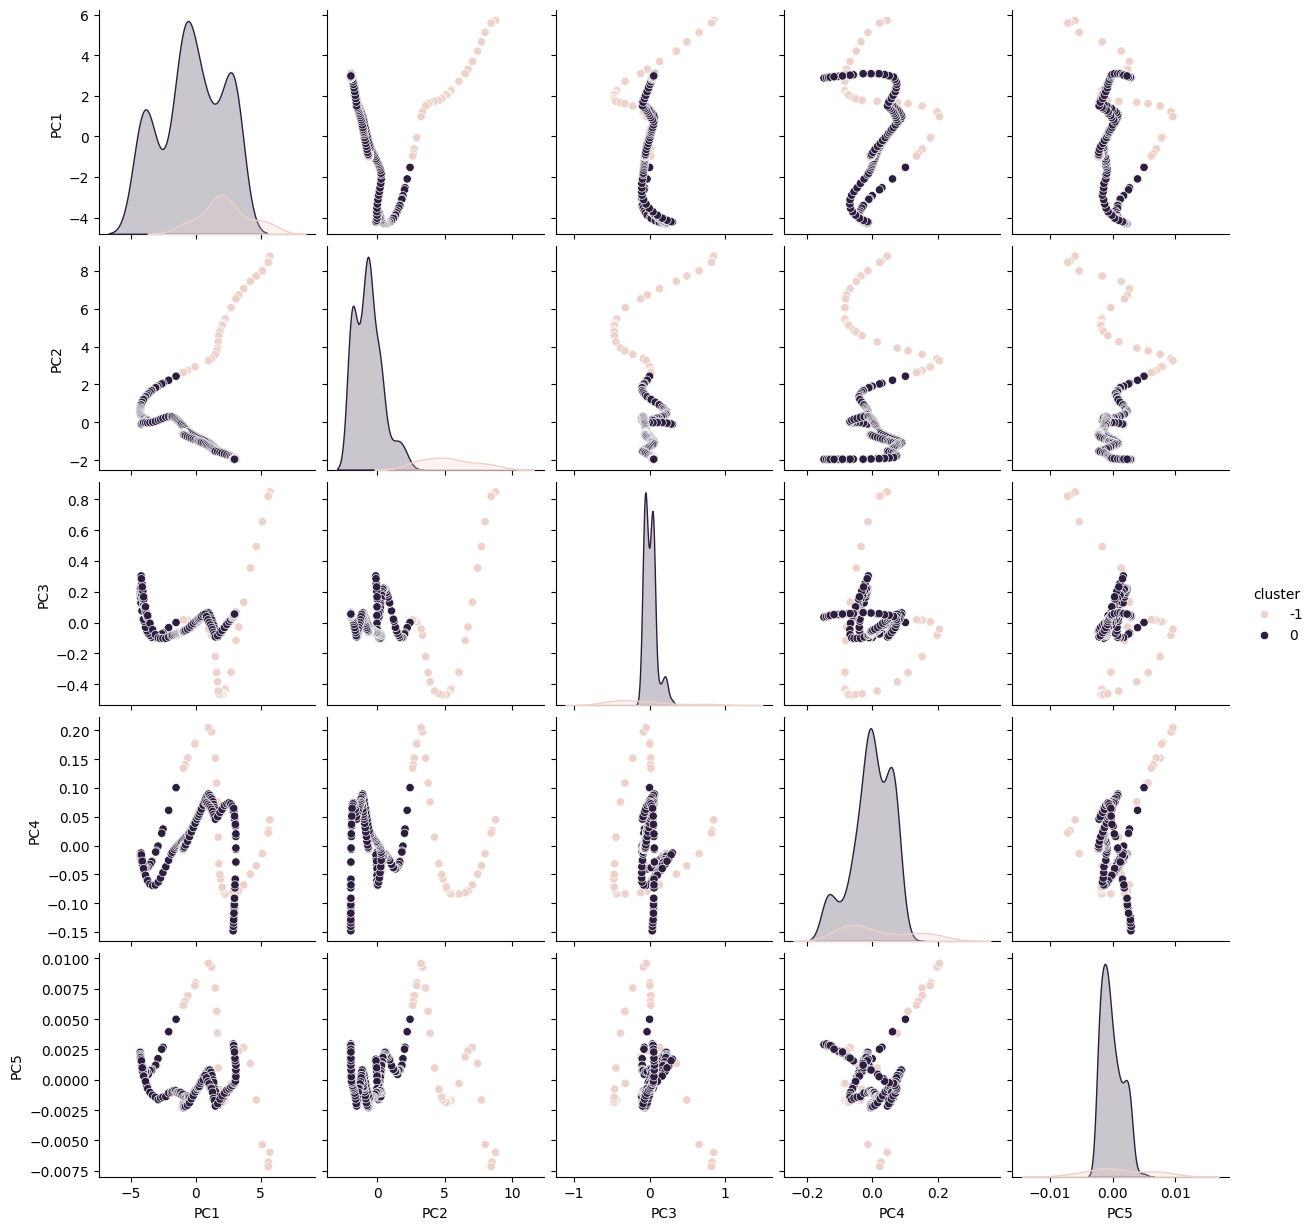

In [ ]:
from sklearn.cluster import DBSCAN
#from ipywidgets import interact

rad = 2.0
db = DBSCAN(rad,min_samples=50).fit(xpca)
transtab['cluster']=db.labels_
print( f"{len(np.unique(db.labels_))} clusters were were found.")
sns.pairplot(transtab,vars=ind, hue="cluster") # Plot.